<a href="https://colab.research.google.com/github/Towshin05/Codesoft_Internship/blob/master/sms_spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!kaggle datasets download -d uciml/sms-spam-collection-dataset

Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
License(s): unknown
  0% 0.00/211k [00:00<?, ?B/s]
100% 211k/211k [00:00<00:00, 45.2MB/s]


In [2]:
import zipfile
zip_ref=zipfile.ZipFile('/content/sms-spam-collection-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('/content/spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.shape

(5572, 2)

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.rename(columns={'v1':'target','v2':'message'},inplace=True)

In [8]:
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
df['target']=LE.fit_transform(df['target'])

In [ ]:
df.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.duplicated().sum()

403

In [ ]:
df.drop_duplicates(inplace=True,keep='first')

In [ ]:
df.shape

(5169, 2)

In [ ]:
df['target'].value_counts()

,count
target,
0,4516
1,653


In [10]:
import nltk # natural language tool kit
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!pip install nltk

In [11]:
df['words']=df['message'].apply(nltk.word_tokenize)

In [12]:
df.head()

,target,message,words
0,0,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy, .., Avail..."
1,0,Ok lar... Joking wif u oni...,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,0,U dun say so early hor... U c already then say...,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,0,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, do, n't, think, he, goes, to, usf, ,,..."


In [13]:
df['characters']=df['message'].apply(len)

In [14]:
df.head()

,target,message,words,characters
0,0,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy, .., Avail...",111
1,0,Ok lar... Joking wif u oni...,"[Ok, lar, ..., Joking, wif, u, oni, ...]",29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",155
3,0,U dun say so early hor... U c already then say...,"[U, dun, say, so, early, hor, ..., U, c, alrea...",49
4,0,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, do, n't, think, he, goes, to, usf, ,,...",61


In [15]:
df['words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [16]:
df.head()

,target,message,words,characters
0,0,"Go until jurong point, crazy.. Available only ...",24,111
1,0,Ok lar... Joking wif u oni...,8,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,155
3,0,U dun say so early hor... U c already then say...,13,49
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61


In [17]:
df['sentences']=df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [18]:
df.head()

,target,message,words,characters,sentences
0,0,"Go until jurong point, crazy.. Available only ...",24,111,2
1,0,Ok lar... Joking wif u oni...,8,29,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,155,2
3,0,U dun say so early hor... U c already then say...,13,49,1
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61,1


In [19]:
df[df['target']==1][['words','sentences','characters']].describe()

,words,sentences,characters
count,747.000000,747.000000,747.000000
mean,27.891566,3.021419,138.866131
std,6.867007,1.537580,29.183082
min,2.000000,1.000000,13.000000
25%,25.000000,2.000000,132.500000
50%,29.000000,3.000000,149.000000
75%,32.000000,4.000000,157.000000
max,46.000000,9.000000,224.000000


In [27]:
import string
string.punctuation

def transform(message):
  message=message.lower()
  message=nltk.word_tokenize(message)

  y=[]
  for i in message:
      if i.isalnum():
        y.append(i)
  message=y[:]
  y.clear()
  for i in message:
      if i not in stopwords.words('english') and i not in string.punctuation:
         y.append(i)


  message=y[:]
  y.clear()
  for i in message:

       y.append(ps.stem(i))


  return " ".join(y)


In [29]:
transform('playing is good!! What 34 are doing?')

'play good 34'

In [32]:
df['message'][40]

'Pls go ahead with watts. I just wanted to be sure. Do have a great weekend. Abiola'

In [24]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [26]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('playing')

'play'

In [34]:
df['modified_msg']=df['message'].apply(transform)

In [35]:
df.head()

,target,message,words,characters,sentences,modified_msg
0,0,"Go until jurong point, crazy.. Available only ...",24,111,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,8,29,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,155,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,13,49,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61,1,nah think goe usf live around though


In [36]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [38]:
spam=wc.generate(df[df['target']==1]['modified_msg'].str.cat(sep=" "))

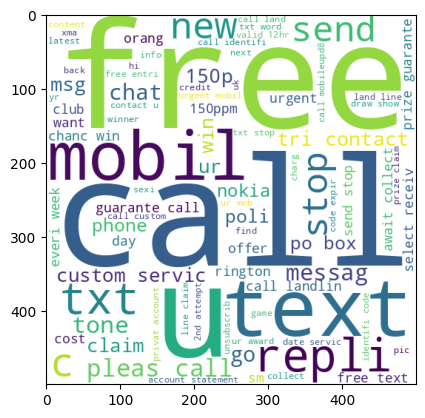

In [39]:
plt.imshow(spam)

In [40]:
ham=wc.generate(df[df['target']==0]['modified_msg'].str.cat(sep=" "))

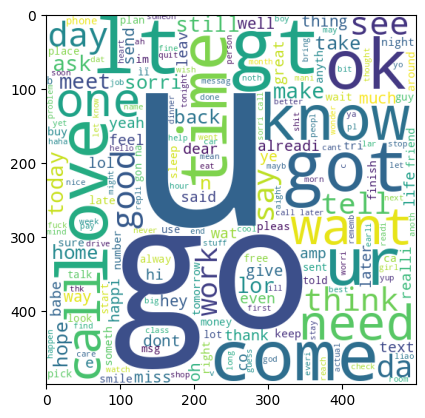

In [41]:
plt.imshow(ham)

In [53]:
df[df['target']==1]['modified_msg'].to_list()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [54]:
spam_corpus=[]
for msg in df[df['target']==1]['modified_msg'].to_list():
  for word in msg.split():
    spam_corpus.append(word)

In [44]:
len(spam_corpus)

11490

In [45]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [57]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(50))[0],pd.DataFrame(Counter(spam_corpus).most_common(50))[1])
plt.xticks(rotation='vertical')
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

In [58]:
ham_corpus=[]
for msg in df[df['target']==0]['modified_msg'].to_list():
  for word in msg.split():
    ham_corpus.append(word)

In [59]:
len(ham_corpus)

38221

In [60]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(50))[0],pd.DataFrame(Counter(ham_corpus).most_common(50))[1])
plt.xticks(rotation='vertical')
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

In [62]:
df.head()

,target,message,words,characters,sentences,modified_msg
0,0,"Go until jurong point, crazy.. Available only ...",24,111,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,8,29,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,155,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,13,49,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61,1,nah think goe usf live around though


In [ ]:
#we need to convert text vectorization

In [107]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

In [108]:
X=cv.fit_transform(df['modified_msg']).toarray()

In [66]:
X.shape

(5572, 6708)

In [109]:
y=df['target'].values

In [70]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [110]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [75]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [111]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [112]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [100]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)

In [101]:
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8738038277511961
[[1272  171]
 [  40  189]]
0.525


In [102]:
mnb.fit(X_train,y_train)

y_pred2=mnb.predict(X_test)


In [113]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)

In [104]:
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9694976076555024
[[1417   26]
 [  25  204]]
0.8869565217391304


In [114]:
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))  # tp  fp
print(precision_score(y_test,y_pred3))   # fn  tn

0.9700956937799043
[[1439    4]
 [  46  183]]
0.9786096256684492


In [115]:
import pickle
pickle.dump(cv,open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb'))